# Social Network Ads

*Harold Petiard, Geoffroy Daumer, Slava Oswald, David Scanu*

## Sommaire : 
- Objectif
- Description des colonnes
- Importer les bibliothèques
- Importer les données
- Analyse statistique de base
- Visualisation
- Préparation des données
- Séparation des données
- Feature selection
- Mise à l'échelle
- Machine learning
- Export du modèle


### Contexte

En tant que Développeur IA, un site vient vous voir avec une problématique de savoir si l’affiche d’une publicité d’un produit XYZ a la chance ou pas d’attirer l’utilisateur et par la suite d’aboutir à une commande par ce dernier. Pour cela, une dataset a été réalisée reprenant des utilisateurs avec leurs caractéristiques et une colonne purchased indiquant si l’utilisateur a commandé ce produit ou pas.

À l'aide des outils que sont streamlit, scikit-learn et pandas, réalisez une application permettant de prédire si ce produit sera commandé par l’utilisateur en fonction des caractéristiques de ce dernier.

### Modalités pédagogiques

- Travail en groupe de 3
- 1 jour de travail

### Critères de performance

- Les données ont été analysées et il existe une trace de cette analyse dans un jupyter-notebook
- L'application réalisée fonctionne sans bug, et classifie précisément les données entrées par l'utilisateur

Modalités d'évaluation

Présentation devant le formateur

Livrables

- lien vers l’application déployée
- dépôt github

## Notre objectif

Prédire si un client va acheter un produit en fonction de son age et de son salaire.

## Description des caractères / colonnes : 

- UserID
- Genre
- Age
- Salaire

Cible : Achat

## Importer les bibliothèques

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importer les données

In [2]:
# Importe les données
data = pd.read_csv('data/social_network_ads.xls') # Dataframe

In [3]:
# Montre les premières lignes du jeu de données
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
# Preparation du dataset
# Convert target numbers to "Iris Species"
def chng(target):
    if target == 0:
        return 'No purchase'
    elif target == 1:
        return 'Purchased'

data['Purchased'] = data['Purchased'].apply(chng)

In [6]:
# Drop column 'User ID'
data = data.drop(['User ID'], axis=1)

In [7]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,No purchase
1,Male,35,20000,No purchase
2,Female,26,43000,No purchase
3,Female,27,57000,No purchase
4,Male,19,76000,No purchase


## Analyse statistique de base

### Moyennes et médianes

In [8]:
data.groupby(['Purchased']).agg(['mean', 'median'])

/tmp/ipykernel_8127/1916678700.py:1: FutureWarning: ['Gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby(['Purchased']).agg(['mean', 'median'])


Age        EstimatedSalary         
                  mean median            mean   median
Purchased                                             
No purchase  32.793774   34.0    60544.747082  61000.0
Purchased    46.391608   47.0    86272.727273  90000.0

In [9]:
data.groupby(['Purchased', 'Gender']).agg(['mean', 'median'])

Age        EstimatedSalary         
                         mean median            mean   median
Purchased   Gender                                           
No purchase Female  33.110236   33.0    61480.314961  62000.0
            Male    32.484615   34.5    59630.769231  60500.0
Purchased   Female  47.155844   48.0    88714.285714  96000.0
            Male    45.500000   46.0    83424.242424  87500.0

### Ecart-type

In [10]:
data.groupby(['Purchased']).std()

/tmp/ipykernel_8127/2431713051.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Purchased']).std()


,Age,EstimatedSalary
Purchased,,
No purchase,7.985844,24351.570102
Purchased,8.612172,42064.200064


## Visualisation

### Pairplot

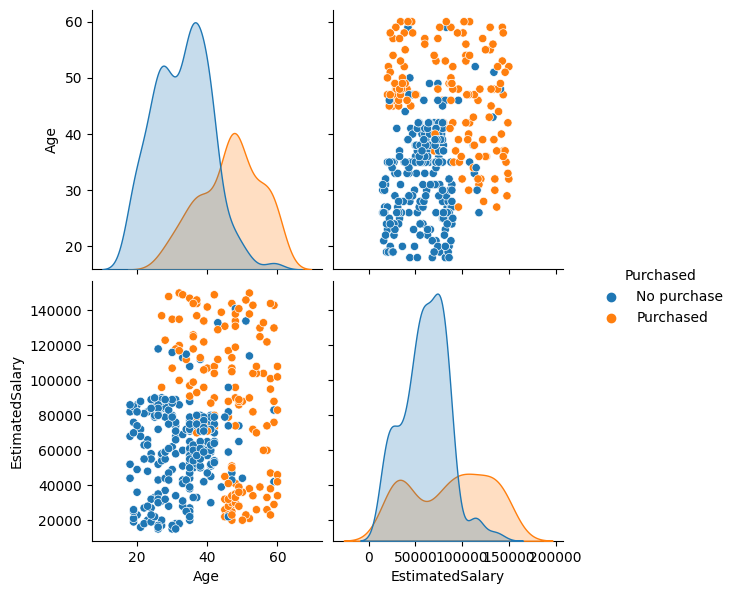

In [11]:
sns.pairplot(data=data, hue="Purchased", height=3)

### Distribution

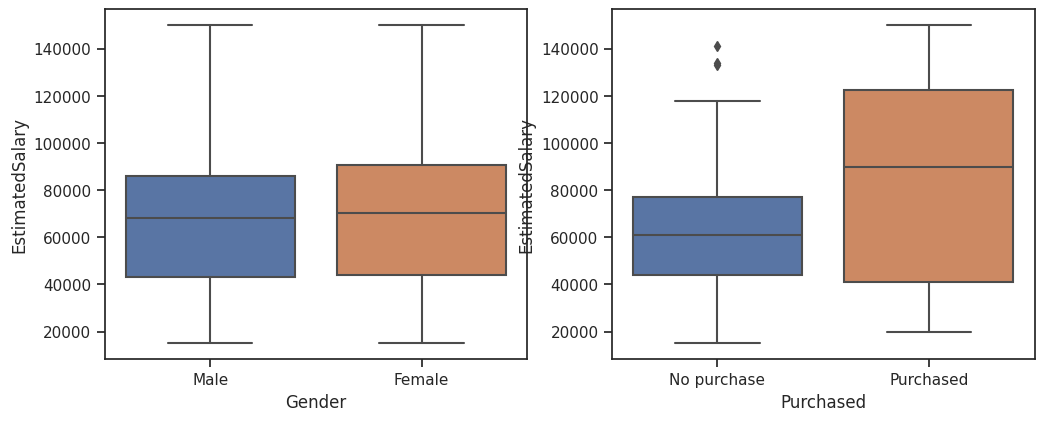

In [12]:
# Boxplot
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Gender',y='EstimatedSalary',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

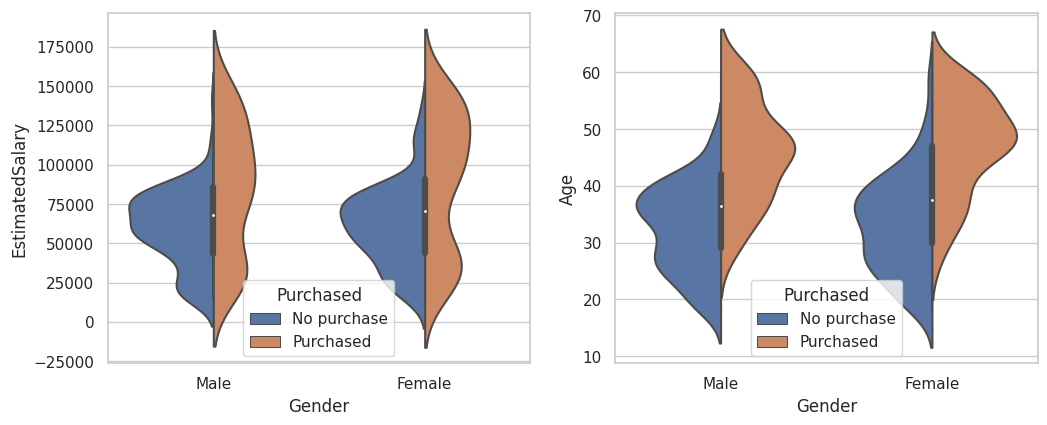

In [13]:
# Violin Plot
# Montre la distribution des données sur plusieurs niveaux
# d'une (ou plusieurs) variables catégorielles de sorte que
# ces distributions puissent être comparées.

sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Gender', y='EstimatedSalary',data=data, split=True, hue='Purchased')
plt.subplot(2,2,2)
sns.violinplot(x='Gender', y='Age',data=data, split=True, hue='Purchased')
plt.show()

### Analyse univariée

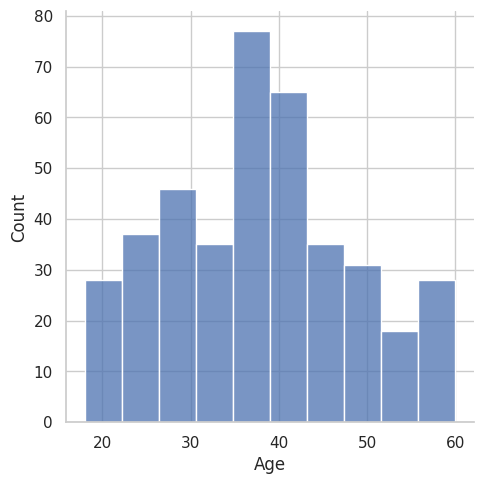

In [14]:
sns.displot(data=data, x='Age')

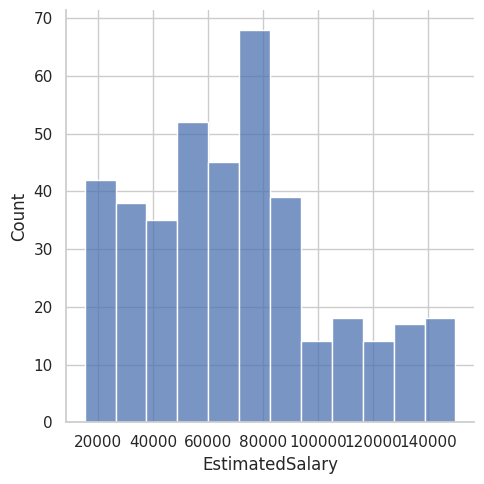

In [15]:
sns.displot(data=data, x='EstimatedSalary')

### Analyse Bivariée

### Encoder les valeurs catégoriques

In [16]:
from sklearn.preprocessing import LabelEncoder

le_purchased = LabelEncoder()
data['Purchased'] = le_purchased.fit_transform(data['Purchased'])

print(data['Purchased'])
print(le_purchased.classes_)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64
['No purchase' 'Purchased']


In [17]:
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

print(data['Gender'])
print(le_gender.classes_)

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64
['Female' 'Male']


#### Tableau de correlations

In [18]:
# Affiche les correlations
data.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


#### Heatmap

<AxesSubplot: >

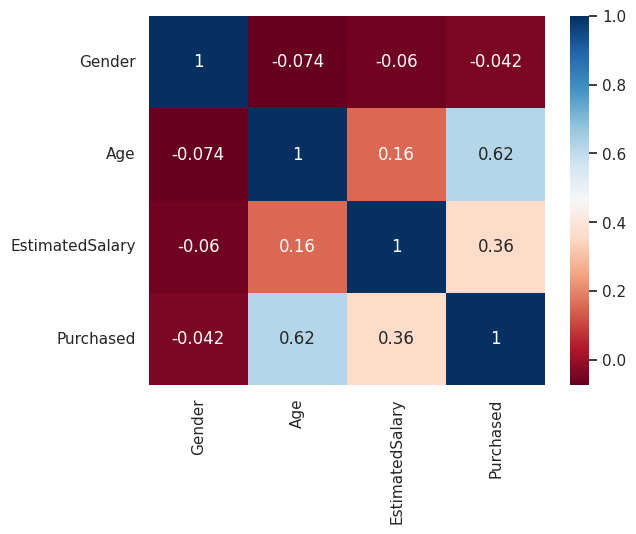

In [19]:
# Visualise les correlations
sns.heatmap(data.corr(), annot=True, cmap='RdBu')

#### Scatter Plot

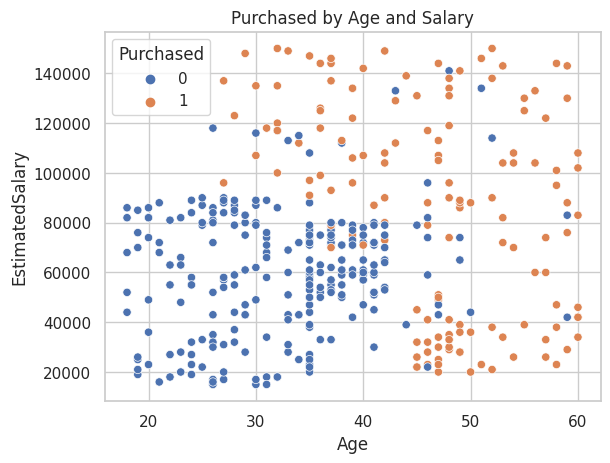

In [20]:
# Visualise l'impact de deux variables sur la cible
sns.scatterplot(data=data, x='Age', y='EstimatedSalary', hue='Purchased')
plt.title('Purchased by Age and Salary')
plt.show()

## Préparations des données

### Nettoyage

Vérifier les valeurs manquantes dans le jeu de données.

In [21]:
print(data.isnull().values.any())

False


In [22]:
print(data.isnull().sum())

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


### Outliers

- Visualiser les outliers avec boxplot()
- Enlever les outliers

### Equilibre

Vérifier que les cibles du jeu de données sont **bien équilibrées**.

In [23]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Séparation des données

Séparer le jeu de données :
- X : les variables
- y : la cible

In [24]:
# Fonctionne avec DataFrame ou ndarray

# Variables
X = data.drop(['Purchased'], axis=1)

# Cible
y = data['Purchased'] # Garder uniquement la colonne cible



In [25]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

Séparer le jeu de données en données d'entrainement et de test :
- X_train : données d'entrainement
- X_test : données de test
- y_train : cible d'entrainement
- y_test : cible de test

In [27]:
from sklearn.model_selection import train_test_split

# Split les données, retourne DataFrame ou ndarray
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print(f"Nombre d'exemples d'entrainement X : {X_train.shape[0]}")
print(f"Nombre d'exemples de test X : {X_test.shape[0]}")
print(' ')
print(f"Nombre d'exemples d'entrainement Y : {y_train.shape[0]}")
print(f"Nombre d'exemples de test Y : {y_test.shape[0]}")

Nombre d'exemples d'entrainement X : 320
Nombre d'exemples de test X : 80
 
Nombre d'exemples d'entrainement Y : 320
Nombre d'exemples de test Y : 80


## Feature Selection

#### SelectKbest

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

# Retourne 2 tableaux :
# - score test chi2, dépendance à y
# - P values
chi2(X_train, y_train)

(array([7.20055514e-02, 3.94864505e+02, 7.08827385e+05]),
 array([7.88438773e-01, 7.22578987e-88, 0.00000000e+00]))

In [29]:
selector_kb = SelectKBest(chi2, k=2)
selector_kb.fit(X_train, y_train)
selector_kb.get_support() # Retourne une seule variable/colonne

array([False,  True,  True])

In [30]:
# Affiche les colonnes restantes
X_kb_columns = list(np.array(X_train.columns)[selector_kb.get_support()])
X_kb_columns

['Age', 'EstimatedSalary']

In [31]:
X_train_kb = selector_kb.transform(X_train)
X_test_kb = selector_kb.transform(X_test)
X_train_kb[:10] # Affiche les 10 première ligne de notre ndarray

array([[    53, 143000],
       [    35,  72000],
       [    42, 149000],
       [    45,  22000],
       [    47,  51000],
       [    42,  80000],
       [    39, 106000],
       [    38,  59000],
       [    41,  63000],
       [    36,  50000]])

## Mise à l'échelle

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_kb)
X_test_scaled = scaler.transform(X_test_kb)

## Machine Learning

### Modèle KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
# Nous entrainons notre modèle avec les données d'entrainements (standardisées)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)
print('Train Score : ', model.score(X_train_scaled, y_train))
print('Test Score : ', model.score(X_test_scaled, y_test))

Train Score :  0.91875
Test Score :  0.9


### Cross-validation

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut, StratifiedShuffleSplit

# Choix de la méthode de validation croisée (échantillonage)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
# cv = LeaveOneOut()

cross_val_res = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print(cross_val_res)

[0.875   0.91875 0.90625 0.925   0.91875]


In [35]:
cross_val_res.mean()

0.9087500000000001

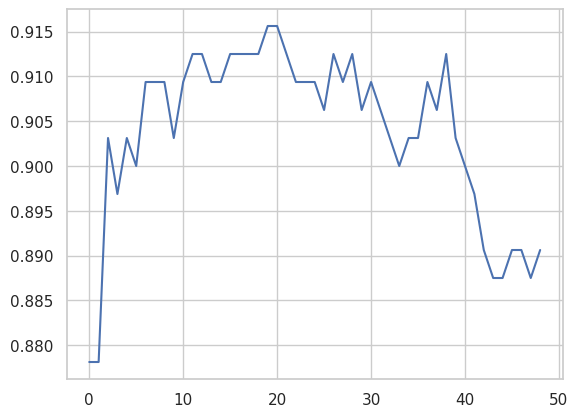

In [36]:
# Cross-validation for each k value
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_scaled, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

### Validation Curve

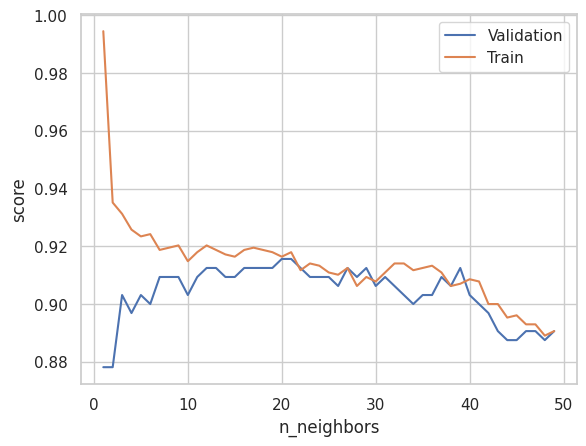

In [37]:
from sklearn.model_selection import validation_curve

k = np.arange(1, 50)
train_score, val_score = validation_curve(KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label="Validation")
plt.plot(k, train_score.mean(axis=1), label="Train")
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

### Grid Search CV

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : np.arange(1, 50), 'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

Afficher le meilleur score

In [39]:
grid.best_score_

0.921875

Afficher les paramètres donnant les meilleures performances

In [40]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 9}

Sauvegarder le meilleur modèle

In [41]:
# Best model
model_best = grid.best_estimator_

Tester le nouveau modèle sur les données de test

In [42]:
# Score du meilleur modèle
model_best.score(X_test_scaled, y_test)

0.8875

### Matrice de confusion

In [43]:
from sklearn.metrics import confusion_matrix

y_pred = model_best.predict(X_test_scaled)
confusion_matrix = confusion_matrix(y_test, y_pred)


In [44]:
cm_data = {'prediction': y_pred, 'actual': y_test}
cm_df = pd.DataFrame(cm_data)
contingency_matrix = pd.crosstab(cm_df['prediction'], cm_df['actual'])
print(contingency_matrix)

actual       0   1
prediction        
0           50   4
1            5  21


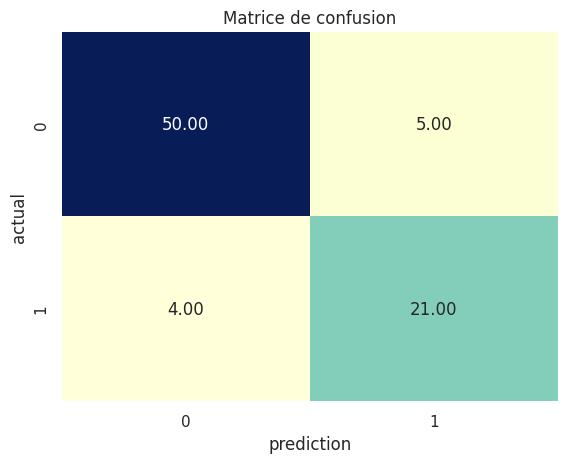

In [45]:
sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion')
plt.show()

#### Learning Curve

[ 25  51  76 102 128 153 179 204 230 256]


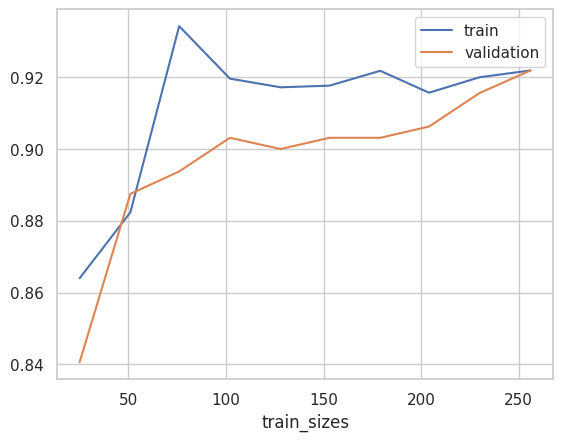

In [46]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_best, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

## Export du modèle

Exporter le modèle avec joblib ou Pickle. Il faut exporter :
- Le modèle
- Le scaler
- le nom des colonnes X
- labelencoder

In [48]:
import pickle

export = {}
# Le modèle
export['model'] = model_best
# La mise à l'échelle
export['scaler'] = scaler
# Le label encoder de y
export['le_purchased'] = le_purchased
# Le nom des colonnes de X
export['X_col_names'] = X_kb_columns

pickle_out = open("model.pkl","wb")
pickle.dump(export, pickle_out)
pickle_out.close()